# -------------------------------------------------------------------------------------------
# PARTE DA AULA, FEITA PELO PROFESSOR E COM O DATASET UTILIZADO POR MIM, RODANDO NOVAMENTE
# -------------------------------------------------------------------------------------------


# Análise Exploratória dos Dados do CNPJ

A Receita Federal do Brasil disponibiliza em seu site a base do CNPJ nacional periódicamente. Assim, faremos uma breve análise exploratória inicial sobre os dados, visando obter alguns *insights* sobre os dados, sua natureza e características

In [8]:
# Caso o Anaconda não esteja instalado, faz a instalação
#!conda install --yes pandas

In [9]:
import sqlite3 # Declara que vamos utilizar o SQlite para ler dados
import pandas as pd

## 1 - Carrega *datasets*

In [10]:
conexao = sqlite3.connect('amostra100pc.sqlite')

# Carrega os dados do CNPJ
df_CNPJ = pd.read_sql_query("SELECT * FROM cnpj_dados_cadastrais_pj where porte_empresa = '03'", conexao)

In [11]:
# Verificamos o tamanho da nossa base de dados
print(df_CNPJ.shape)

(1294048, 40)


In [12]:
df_desc_cnae = pd.read_sql_query("SELECT cod_secao, nm_secao, cod_cnae FROM tab_cnae", conexao)
df_desc_cnae.head()

,cod_secao,nm_secao,cod_cnae
0,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111301
1,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111302
2,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111303
3,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0111399
4,A,AGRICULTURA PECUÁRIA PRODUÇÃO FLORESTAL PESCA ...,0112101


In [13]:
df_uf_regiao = pd.read_csv('uf_regiao.csv')
df_uf_regiao.head()

,uf,regiao
0,AM,Norte
1,RR,Norte
2,AP,Norte
3,PA,Norte
4,TO,Norte


## 2 - Funções Básicas para Análise

In [14]:
def tabela_categoricas(df,col,name_col):
    df_1 = pd.DataFrame(df[col].value_counts()).reset_index()
    df_1.columns = [name_col,'Qtd empresas']
    df_1['%Total'] = (df_1['Qtd empresas']/len(df))*100
    return df_1

In [15]:
def distribuicaoNumericas(df,col,nameCol):
    med = pd.DataFrame(columns=[nameCol], index=['Media', 'Mediana', 'Minimo','Maximo'])
    med.loc['Media'][nameCol] = float(df[col].mean())
    med.loc['Mediana'][nameCol] = float(df[col].median())
    med.loc['Minimo'][nameCol] = float(df[col].min())
    med.loc['Maximo'][nameCol] = float(df[col].max())
    return med

## 3 - Análises Iniciais

### 3.1 - Limpeza dos Dados

In [16]:
df_cnpjs = df_CNPJ.copy()

df_cnpjs = df_cnpjs[(df_cnpjs["situacao_cadastral"].isin(["08","02"]))]
print(df_cnpjs.shape)
df_cnpjs.head()

(1180532, 40)


,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro
0,1,F,,00000210000180,1,ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA,INTERMUNDI,02,2005-11-03,00,...,0.0,03,5,2007-07-01,None,N,,None,,F
1,1,F,,00000213000113,1,WAN INFORMATICA SERVICOS E COMERCIO LTDA,,08,2016-12-14,01,...,0.0,03,0,None,None,N,,None,,F
2,1,F,,00000268000123,1,CFN PARTICIPACOES E INTERMEDIACOES LTDA,,02,2005-11-03,00,...,1000.0,03,0,None,None,N,,None,,F
3,1,F,,00000326000119,1,"FAGER - SERVICOS, COMERCIO E INDUSTRIA DE GRUP...",FAGER ELETRO-ELETRONICA LTDA,02,2005-08-06,00,...,10000.0,03,5,2007-07-01,None,N,,None,,F
5,1,F,,00000395000122,1,OSAKA DESENTUPIDORA E DEDETIZADORA EIRELI,,02,2005-11-03,00,...,100000.0,03,6,2017-01-01,2018-12-31,N,,None,,F


In [17]:
# Descrição do Porte da Empresa
df_cnpjs['porte_empresa_descr'] = df_cnpjs['porte_empresa'].replace(['00','01','03','05'],['NAO INFORMADO','MICRO EMPRESA','EMPRESA DE PEQUENO PORTE','DEMAIS'])
df_cnpjs['situacao_atividade']= df_cnpjs['situacao_cadastral'].replace(['08','02'],['INATIVA','ATIVA'])
df_cnpjs.head()

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,porte_empresa_descr,situacao_atividade
0,1,F,,00000210000180,1,ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA,INTERMUNDI,02,2005-11-03,00,...,5,2007-07-01,None,N,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA
1,1,F,,00000213000113,1,WAN INFORMATICA SERVICOS E COMERCIO LTDA,,08,2016-12-14,01,...,0,None,None,N,,None,,F,EMPRESA DE PEQUENO PORTE,INATIVA
2,1,F,,00000268000123,1,CFN PARTICIPACOES E INTERMEDIACOES LTDA,,02,2005-11-03,00,...,0,None,None,N,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA
3,1,F,,00000326000119,1,"FAGER - SERVICOS, COMERCIO E INDUSTRIA DE GRUP...",FAGER ELETRO-ELETRONICA LTDA,02,2005-08-06,00,...,5,2007-07-01,None,N,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA
5,1,F,,00000395000122,1,OSAKA DESENTUPIDORA E DEDETIZADORA EIRELI,,02,2005-11-03,00,...,6,2017-01-01,2018-12-31,N,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA


In [18]:
df_cnpjs['cnae_fiscal']


0          8512100
1          4751201
2          7490104
3          2710401
5          8122200
            ...   
1294042    4731800
1294043    4771701
1294044    4771701
1294045    4771701
1294046    4771701
Name: cnae_fiscal, Length: 1180532, dtype: object

In [19]:
# Join para incluir descrição do CNAE
df_cnpjs = pd.merge(df_cnpjs, df_desc_cnae,how='left', left_on=['cnae_fiscal'], right_on=['cod_cnae'])
df_cnpjs = pd.merge(df_cnpjs, df_uf_regiao,how='left', on=['uf'])
df_cnpjs.head()

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,situacao_especial,data_situacao_especial,filler,fim_registro,porte_empresa_descr,situacao_atividade,cod_secao,nm_secao,cod_cnae,regiao
0,1,F,,00000210000180,1,ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA,INTERMUNDI,02,2005-11-03,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,P,EDUCAÇÃO,8512100,Sudeste
1,1,F,,00000213000113,1,WAN INFORMATICA SERVICOS E COMERCIO LTDA,,08,2016-12-14,01,...,,None,,F,EMPRESA DE PEQUENO PORTE,INATIVA,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,4751201,Sudeste
2,1,F,,00000268000123,1,CFN PARTICIPACOES E INTERMEDIACOES LTDA,,02,2005-11-03,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,7490104,Sudeste
3,1,F,,00000326000119,1,"FAGER - SERVICOS, COMERCIO E INDUSTRIA DE GRUP...",FAGER ELETRO-ELETRONICA LTDA,02,2005-08-06,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,C,INDÚSTRIAS DE TRANSFORMAÇÃO,2710401,Sudeste
4,1,F,,00000395000122,1,OSAKA DESENTUPIDORA E DEDETIZADORA EIRELI,,02,2005-11-03,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,N,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,8122200,Sudeste


In [20]:
tabela_categoricas(df_cnpjs,'situacao_atividade', 'Atividade')

,Atividade,Qtd empresas,%Total
0,ATIVA,916561,77.639657
1,INATIVA,263971,22.360343


In [21]:
df_cnpjs['data_inicio_atividade'] = pd.to_datetime(df_cnpjs['data_inicio_atividade'])
df_cnpjs['data_situacao_cadastral'] = pd.to_datetime(df_cnpjs['data_situacao_cadastral'])

#print(df_cnpjs.dtypes)

In [22]:
# Seleciono empresas que fecharam em 2020, independentemente de quando abriram 
df_cnpjs_filtrado = df_cnpjs[(df_cnpjs['data_situacao_cadastral'] >= "2020-01-01") & 
                            (df_cnpjs['situacao_cadastral'] < "08")]
df_cnpjs_filtrado.shape

(37896, 46)

#### 3.1.1 - Análise Básica

In [23]:
# Verifica a distribuição por categorias de atividade na base total
tabela_categoricas(df_cnpjs,'nm_secao','SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,490143,41.518824
1,INDÚSTRIAS DE TRANSFORMAÇÃO,119465,10.119590
2,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,84295,7.140425
3,CONSTRUÇÃO,80394,6.809981
4,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,77130,6.533495
5,TRANSPORTE ARMAZENAGEM E CORREIO,66736,5.653045
6,ALOJAMENTO E ALIMENTAÇÃO,58655,4.968523
7,SAÚDE HUMANA E SERVIÇOS SOCIAIS,58560,4.960475
8,INFORMAÇÃO E COMUNICAÇÃO,34447,2.917922
9,ATIVIDADES IMOBILIÁRIAS,24475,2.073218


In [24]:
# Verifica a distribuição do tamanho das empresas na base total
tabela_categoricas(df_cnpjs,'porte_empresa_descr','Porte')

,Porte,Qtd empresas,%Total
0,EMPRESA DE PEQUENO PORTE,1180532,100.0


In [25]:
# Mostra o porte das empresas que fecharam esse ano (2020)
tabela_categoricas(df_cnpjs_filtrado,'porte_empresa_descr','Porte')

,Porte,Qtd empresas,%Total
0,EMPRESA DE PEQUENO PORTE,37896,100.0


In [26]:
# Mostra o dado tabular das áreas de atuação das empresas que fecharam esse ano
tabela_categoricas(df_cnpjs_filtrado,'nm_secao','SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,13265,35.003694
1,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,3464,9.140806
2,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,3384,8.929702
3,CONSTRUÇÃO,2854,7.531138
4,SAÚDE HUMANA E SERVIÇOS SOCIAIS,2592,6.839772
5,INDÚSTRIAS DE TRANSFORMAÇÃO,2366,6.243403
6,ALOJAMENTO E ALIMENTAÇÃO,1949,5.143023
7,TRANSPORTE ARMAZENAGEM E CORREIO,1858,4.902892
8,INFORMAÇÃO E COMUNICAÇÃO,1370,3.615157
9,ATIVIDADES IMOBILIÁRIAS,1056,2.786574


#### 3.1.2 - Capital Social das Empresas

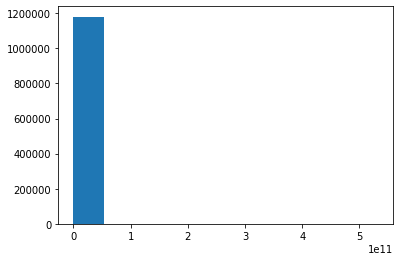

In [27]:
df_cnpjs['capital_social_empresa'].hist(grid = False)

In [28]:
distribuicaoNumericas(df_cnpjs,'capital_social_empresa','Capital Social - Empresas')

,Capital Social - Empresas
Media,1.38642e+06
Mediana,20000
Minimo,0
Maximo,5.32013e+11


In [29]:
df_cnpjs[df_cnpjs['capital_social_empresa']==0].shape[0]

334998

In [30]:
df_cnpjs[df_cnpjs['capital_social_empresa'] > 10000000000]

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,...,situacao_especial,data_situacao_especial,filler,fim_registro,porte_empresa_descr,situacao_atividade,cod_secao,nm_secao,cod_cnae,regiao
9667,1,F,,00331465000125,1,INCOMPLAST INDUSTRIA DE EMBALAGENS PLASTICAS LTDA,INCOMPLAST,02,2005-11-03,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,C,INDÚSTRIAS DE TRANSFORMAÇÃO,2222600,Nordeste
237639,1,F,,05885737000152,1,TRANSCOL SERVICOS EM TRANSPORTES DE JUNDIAI LTDA,,08,2014-03-24,01,...,,None,,F,EMPRESA DE PEQUENO PORTE,INATIVA,H,TRANSPORTE ARMAZENAGEM E CORREIO,5229099,Sudeste
301442,1,F,,07626060000163,1,LGL PINTURAS LTDA,LGL PINTURAS,02,2005-09-16,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,F,CONSTRUÇÃO,4330404,Centro-Oeste
379144,1,F,,09611078000117,1,J. A. DIVULGACOES E EVENTOS LTDA,J. A. DIVULGACOES,08,2015-08-06,01,...,,None,,F,EMPRESA DE PEQUENO PORTE,INATIVA,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,7490105,Sul
427462,1,F,,11351385000158,1,BAR E LANCHERIA GABRIEL LTDA,BAR E LANCHERIA GABRIEL LTDA,08,2010-05-04,01,...,,None,,F,EMPRESA DE PEQUENO PORTE,INATIVA,I,ALOJAMENTO E ALIMENTAÇÃO,5611204,Sul
438486,1,F,,11666101000112,1,M C ROCHA E OLIVEIRA LTDA,MEC-EMPREENDIMENTOS E TRANSPOSTES,02,2010-03-08,00,...,,None,,F,EMPRESA DE PEQUENO PORTE,ATIVA,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,4744099,Nordeste


In [31]:
# Separo as empresas ativas das inativas
cnpjAtivos = df_cnpjs[df_cnpjs['situacao_cadastral'] == "02"].copy()
cnpjInativo = df_cnpjs[df_cnpjs['situacao_cadastral'] == "08"].copy()

In [32]:
cnpjAtivos['idade'] = pd.to_datetime("2020-07-04") - cnpjAtivos['data_inicio_atividade']
print(cnpjAtivos.head())

  tipo_de_registro indicador tipo_atualizacao            cnpj  \
0                1         F                   00000210000180   
2                1         F                   00000268000123   
3                1         F                   00000326000119   
4                1         F                   00000395000122   
5                1         F                   00000455000107   

  identificador_matriz_filial  \
0                           1   
2                           1   
3                           1   
4                           1   
5                           1   

                                        razao_social  \
0        ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA   
2            CFN PARTICIPACOES E INTERMEDIACOES LTDA   
3  FAGER - SERVICOS, COMERCIO E INDUSTRIA DE GRUP...   
4          OSAKA DESENTUPIDORA E DEDETIZADORA EIRELI   
5                                     OTICA 512 LTDA   

                  nome_fantasia situacao_cadastral data_situacao_cadastra

In [33]:
cnpjAtivos['idade'] = pd.to_numeric(cnpjAtivos['idade'].dt.days, downcast = 'integer') / 365
print(cnpjAtivos.head())

  tipo_de_registro indicador tipo_atualizacao            cnpj  \
0                1         F                   00000210000180   
2                1         F                   00000268000123   
3                1         F                   00000326000119   
4                1         F                   00000395000122   
5                1         F                   00000455000107   

  identificador_matriz_filial  \
0                           1   
2                           1   
3                           1   
4                           1   
5                           1   

                                        razao_social  \
0        ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA   
2            CFN PARTICIPACOES E INTERMEDIACOES LTDA   
3  FAGER - SERVICOS, COMERCIO E INDUSTRIA DE GRUP...   
4          OSAKA DESENTUPIDORA E DEDETIZADORA EIRELI   
5                                     OTICA 512 LTDA   

                  nome_fantasia situacao_cadastral data_situacao_cadastra

In [34]:
distribuicaoNumericas(cnpjAtivos, 'idade' , 'Idade das Empresas Ativas')

,Idade das Empresas Ativas
Media,12.3257
Mediana,8.96438
Minimo,0.00273973
Maximo,100.175


In [35]:
cnpjInativo['idade'] = cnpjInativo['data_situacao_cadastral'] - cnpjInativo['data_inicio_atividade']
cnpjInativo['idade'] = pd.to_numeric(cnpjInativo['idade'].dt.days, downcast = 'integer') / 365
distribuicaoNumericas(cnpjInativo, 'idade' , 'Idade das Empresas Inativas')

,Idade das Empresas Inativas
Media,7.51697
Mediana,4.91507
Minimo,-9.11507
Maximo,78.2959


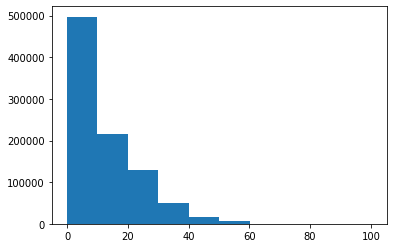

In [36]:
cnpjAtivos['idade'].hist(grid = False, bins = 10)

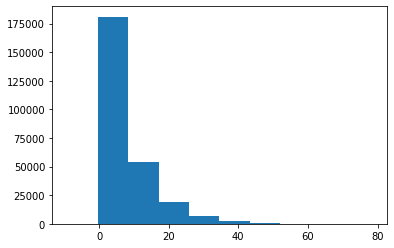

In [37]:
cnpjInativo['idade'].hist(grid = False, bins = 10)

In [38]:
cnpjAtivos['anoAbertura'] = cnpjAtivos['data_inicio_atividade'].dt.year
cnpjInativo['anoAbertura'] = cnpjInativo['data_inicio_atividade'].dt.year
cnpjInativo['anoFechamento'] = cnpjInativo['data_situacao_cadastral'].dt.year
df_cnpjs['anoAbertura'] = df_cnpjs['data_inicio_atividade'].dt.year

In [39]:
abert_anos = pd.DataFrame(df_cnpjs['anoAbertura'].value_counts()).reset_index()
abert_anos = abert_anos[abert_anos['index'] > 1984]
abert_anos.columns = ['Ano Abertura' , 'Qtd. Empresas']
abert_anos['Ano Abertura'] = abert_anos['Ano Abertura'].apply(str)
abert_anos = abert_anos.sort_values(by='Ano Abertura')

Text(0.5, 0, 'Ano Abertura')

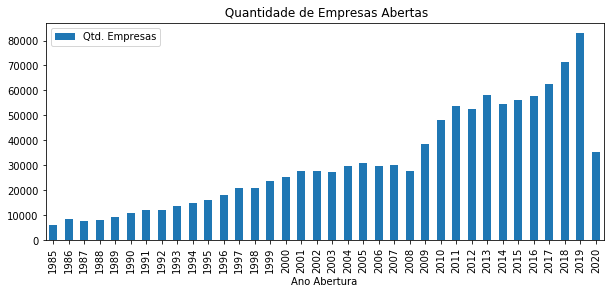

In [40]:
ax = abert_anos.plot(kind = "bar", x = 'Ano Abertura',
                     title = " Quantidade de Empresas Abertas",figsize = (10,4))
ax.set_xlabel("Ano Abertura")

In [41]:
df_cnpjs_ult_ano = df_cnpjs[(df_cnpjs['anoAbertura'] > 2018) & (df_cnpjs['uf'] == 'DF')]
tabela_categoricas(df_cnpjs_ult_ano, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,1081,34.350175
1,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,322,10.231967
2,ALOJAMENTO E ALIMENTAÇÃO,322,10.231967
3,SAÚDE HUMANA E SERVIÇOS SOCIAIS,292,9.278678
4,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,242,7.689863
5,CONSTRUÇÃO,162,5.147760
6,INFORMAÇÃO E COMUNICAÇÃO,120,3.813155
7,INDÚSTRIAS DE TRANSFORMAÇÃO,106,3.368287
8,ATIVIDADES FINANCEIRAS DE SEGUROS E SERVIÇOS R...,99,3.145853
9,ATIVIDADES IMOBILIÁRIAS,96,3.050524


In [42]:
fech_anos = pd.DataFrame(cnpjInativo['anoFechamento'].value_counts()).reset_index()
fech_anos = fech_anos[fech_anos['index'] > 1984]
fech_anos.columns = ['Ano Fechamento','Qtd Empresas']
fech_anos['Ano Fechamento'] = fech_anos['Ano Fechamento'].apply(str)
fech_anos = fech_anos.sort_values(by='Ano Fechamento')

Text(0.5, 0, 'Ano Fechamento')

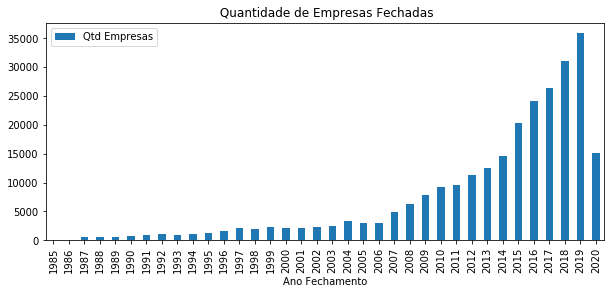

In [43]:
ax = fech_anos.plot(kind = "bar", x = 'Ano Fechamento',
                    title = " Quantidade de Empresas Fechadas",figsize = (10,4))
ax.set_xlabel("Ano Fechamento")

In [44]:
df_cnpjs_ult_ano = cnpjInativo[(cnpjInativo['anoFechamento'] > 2019)]
tabela_categoricas(df_cnpjs_ult_ano, 'nm_secao', 'SEÇÃO')

,SEÇÃO,Qtd empresas,%Total
0,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E M...,6724,44.547502
1,INDÚSTRIAS DE TRANSFORMAÇÃO,1158,7.671923
2,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEME...,1132,7.499669
3,ALOJAMENTO E ALIMENTAÇÃO,1035,6.857029
4,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,925,6.128263
5,CONSTRUÇÃO,875,5.797005
6,TRANSPORTE ARMAZENAGEM E CORREIO,819,5.425997
7,INFORMAÇÃO E COMUNICAÇÃO,634,4.200345
8,SAÚDE HUMANA E SERVIÇOS SOCIAIS,526,3.484828
9,EDUCAÇÃO,299,1.980920


In [45]:
uf_fechamento = pd.DataFrame(cnpjInativo['uf'].value_counts()).reset_index()
uf_fechamento.columns = ['Estados', 'Quantidade de Empresas Fechadas']
uf_fechamento = uf_fechamento.sort_values(by='Estados')

Text(0.5, 0, 'UF')

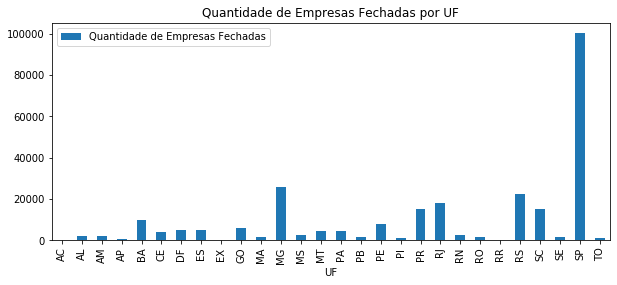

In [46]:
ax = uf_fechamento.plot(kind = "bar", x = 'Estados',
                    title = "Quantidade de Empresas Fechadas por UF",figsize = (10,4))
ax.set_xlabel("UF")

In [47]:
uf_fechamento = pd.DataFrame(df_cnpjs_ult_ano['uf'].value_counts()).reset_index()
uf_fechamento.columns = ['Estados', 'Quantidade de Empresas Fechadas']
uf_fechamento = uf_fechamento.sort_values(by='Estados')

Text(0.5, 0, 'UF')

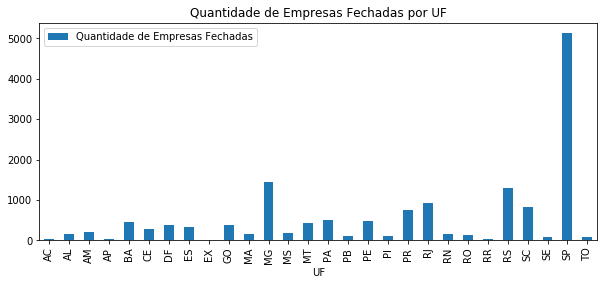

In [48]:
ax = uf_fechamento.plot(kind = "bar", x = 'Estados',
                    title = "Quantidade de Empresas Fechadas por UF",figsize = (10,4))
ax.set_xlabel("UF")

# -------------------------------------------------------------------------------------------
# AQUI COMEÇA MINHA PARTE DA ANÁLISE COM OS DADOS DOS GOVERNADOES 
# -------------------------------------------------------------------------------------------

# **Trabalho Final de Softwares para Ciência de Dados 3 - Giovanni Riccardi Lourenzatto**
## **Análise dos dados de CNPJ de empresas de pequeno porte durante o período dos 2 últimos governos**

In [49]:
## bibliotecas
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## melhorando visualização
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)


## -------------------------------------------------------------------------------------------------------------------------
## **Carregando os dados das empresas de pequeno porte, eleições e número populacional por UF**
#### Os dados utilizados da tabela de cnpj vão de janeiro de 2015 até julho de 2020
#### Os dados de eleição foram retirados do site do TSE
#### Os dados da população por UF, foi retirado da plataforma do IBGE
## -------------------------------------------------------------------------------------------------------------------------

In [50]:
conexao = sqlite3.connect('amostra100pc.sqlite')

# Carrega os dados do CNPJ de empresas de pequeno porte e combinando com a tabela cnae
df_cnpj = pd.read_sql_query("SELECT * FROM cnpj_dados_cadastrais_pj as pj left join tab_cnae as cnae on pj.cnae_fiscal=cnae.cod_cnae where porte_empresa = '03' and situacao_cadastral in('08','02')", conexao)

In [51]:
df_cnpj.head(3)


,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae
0,1,F,,00000210000180,1,ESCOLA DE EDUCACAO INFANTIL INTERMUNDI LTDA,INTERMUNDI,02,2005-11-03,00,,,,2062,1994-07-12,8512100,PRACA,CENTENARIO,136,,CASA VERDE,02515040,SP,7107,SAO PAULO,,,,,49,0.0,03,5,2007-07-01,None,N,,None,,F,P,EDUCAÇÃO,85,EDUCAÇÃO,85.1,Educação infantil e ensino fundamental,85.12-1,Educação infantil - pré-escola,8512100,Educação infantil - pré-escola
1,1,F,,00000213000113,1,WAN INFORMATICA SERVICOS E COMERCIO LTDA,,08,2016-12-14,01,,,,2062,1994-07-21,4751201,RUA,CONEGO EUGENIO LEITE,631,CONJ. 34,PINHEIROS,05414011,SP,7107,SAO PAULO,011 31054011,,011 32425394,,49,0.0,03,0,None,None,N,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.5,Comércio varejista de equipamentos de informática e comunicação equipamentos e artigos de uso doméstico,47.51-2,Comércio varejista especializado de equipamentos e suprimentos de informática,4751201,Comércio varejista especializado de equipamentos e suprimentos de informática
2,1,F,,00000268000123,1,CFN PARTICIPACOES E INTERMEDIACOES LTDA,,02,2005-11-03,00,,,,2240,1994-08-01,7490104,RUA,HENRI BOUCHARD,127,APTO 4,JAGUARE,05319070,SP,7107,SAO PAULO,,,,,49,1000.0,03,0,None,None,N,,None,,F,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,74,OUTRAS ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,74.9,Atividades profissionais científicas e técnicas não especificadas anteriormente,74.90-1,Atividades profissionais científicas e técnicas não especificadas anteriormente,7490104,Atividades de intermediação e agenciamento de serviços e negócios em geral exceto imobiliários


In [52]:
dfcandidatos2014 = pd.read_excel('eleicao2014.xlsx')
dfcandidatos2018 = pd.read_excel('eleicao2018.xlsx')
dfpopulacao = pd.read_excel('populacao.xlsx')

In [53]:
dfpopulacao.head(3)

,populacao,uf
0,1796460,RO
1,894470,AC
2,4207714,AM


In [54]:
dfcandidatos2014.shape, dfcandidatos2014.shape

((27, 58), (27, 58))

### selecionando os dados que seram utilizados durante o trabalho

In [55]:
## transformando as datas
df_cnpj['data_inicio_atividade'] = pd.to_datetime(df_cnpj['data_inicio_atividade'])
df_cnpj['data_situacao_cadastral'] = pd.to_datetime(df_cnpj['data_situacao_cadastral'])

In [56]:
## selecionando os dados das duas ultimas eleições
df_cnpj_eleicoes = df_cnpj[(df_cnpj['data_situacao_cadastral'] >= "2015-01-01")]

In [57]:
## dividindo o dataset em eleição de 2014 e 2018 para realizar o join 
df_cnpj_eleicoes2014 = df_cnpj_eleicoes[(df_cnpj_eleicoes['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_eleicoes['data_inicio_atividade'] < "2019-1-01") ]
df_cnpj_eleicoes2018 = df_cnpj_eleicoes[(df_cnpj_eleicoes['data_inicio_atividade'] >= "2019-01-01")]

In [58]:
df_cnpj_eleicoes2014.shape, df_cnpj_eleicoes2018.shape

((247518, 50), (118313, 50))

In [59]:
## selecionando as colunas dos arquivos de candidatos
dfcandidatos2014.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,NR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO
0,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,2,144,Eleições Gerais 2014,2014-10-26,FEDERAL,AC,AC,ACRE,3,GOVERNADOR,10000000152,13,SEBASTIÃO AFONSO VIANA MACEDO NEVES,TIÃO VIANA,#NULO#,9137394215,#NULO#,12,APTO,2,DEFERIDO,COLIGAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,10000000026,Frente Popular do Acre,PDT / PRB / PT / PSL / PTN / PSDC / PHS / PSB / PRP / PEN / PPL / PC do B / PROS / PTB,1,BRASILEIRA NATA,AC,-3,RIO BRANCO,1961-02-09,53,2288622410,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,274,GOVERNADOR,-1,1,ELEITO,S,S,53102014,2198920146010000
1,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,2014-10-05,FEDERAL,AL,AL,ALAGOAS,3,GOVERNADOR,20000000202,15,JOSE RENAN VASCONCELOS CALHEIROS FILHO,RENAN FILHO,#NULO#,71014772168,RENANFILHO15@HOTMAIL.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,15,PMDB,PARTIDO DO MOVIMENTO DEMOCRÁTICO BRASILEIRO,20000000009,COM O POVO PRA ALAGOAS MUDAR,PV / PT do B / PMDB / PROS / PC do B / PSC / PHS / PTB / PSD / PDT / PT,1,BRASILEIRA NATA,AL,-3,MURICI,1979-10-08,35,24323961791,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,277,DEPUTADO,59000000,1,ELEITO,N,S,99072014,7557320146020000
2,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,2,144,Eleições Gerais 2014,2014-10-26,FEDERAL,AM,AM,AMAZONAS,3,GOVERNADOR,40000000487,90,JOSÉ MELO DE OLIVEIRA,JOSÉ MELO,#NULO#,1182595200,PROFESSOR.MELO@BOL.COM.BR,12,APTO,2,DEFERIDO,COLIGAÇÃO,90,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,40000000049,Fazendo Mais Por Nossa Gente,PROS / DEM / PSL / PTN / PSC / PR / PRTB / PHS / PTC / PV / PRP / PSDB / PEN / PSD / SD / PT do B,1,BRASILEIRA NATA,AM,-3,IPIXUNA,1946-09-26,68,705472208,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,274,GOVERNADOR,-1,1,ELEITO,S,S,127812014,5318120146040000
3,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,2,144,Eleições Gerais 2014,2014-10-26,FEDERAL,AP,AP,AMAPÁ,3,GOVERNADOR,30000000088,12,ANTÔNIO WALDEZ GÓES DA SILVA,WALDEZ,#NULO#,12617555291,WALDEZGOES@HOTMAIL.COM,12,APTO,16,DEFERIDO COM RECURSO,COLIGAÇÃO,12,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,30000000006,A FORÇA DO POVO,PP / PDT / PMDB,1,BRASILEIRA NATA,PA,-3,GURUPA,1961-10-29,53,25582550,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,999,OUTROS,-1,1,ELEITO,N,S,66442014,4860720146030000
4,2018-10-26,15:56:28,2014,2,ELEIÇÃO ORDINÁRIA,1,143,Eleições Gerais 2014,2014-10-05,FEDERAL,BA,BA,BAHIA,3,GOVERNADOR,50000000401,13,RUI COSTA DOS SANTOS,RUI COSTA,#NULO#,23790997587,JURIDICO-RC@GMAILGROUPS.COM,12,APTO,2,DEFERIDO,COLIGAÇÃO,13,PT,PARTIDO DOS TRABALHADORES,50000000007,PRA BAHIA MUDAR MAIS,PT / PP / PSD / PDT / PR / PC do B / PTB / PMN,1,BRASILEIRA NATA,BA,-3,SALVADOR,1963-01-18,51,5915940558,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),3,PARDA,277,DEPUTADO,65000000,1,ELEITO,N,S,365172014,3011220146050000


### As colunas escolhidas do dataset foram : 
#### SG_UF : responsável pelo join dos estados
#### NM_URNA_CANDIDATO : nome do candidato
#### SG_PARTIDO : Sigla do partido
#### NR_IDADE_DATA_POSSE : idade de quando tomou posse
#### DS_GENERO : Sexo

In [60]:
## selecionando as colunas
dfcandidatos2014 = dfcandidatos2014[['SG_UF','NM_URNA_CANDIDATO','SG_PARTIDO','NR_IDADE_DATA_POSSE','DS_GENERO']]
dfcandidatos2018 = dfcandidatos2018[['SG_UF','NM_URNA_CANDIDATO','SG_PARTIDO','NR_IDADE_DATA_POSSE','DS_GENERO']]

In [61]:
dfcandidatos2014.shape,dfcandidatos2018.shape

((27, 5), (27, 5))

In [62]:
## realizando o join 
df_cnpj_eleicoes2014 = df_cnpj_eleicoes2014.merge(dfcandidatos2014,left_on='uf', right_on='SG_UF',how='left')
df_cnpj_eleicoes2018 = df_cnpj_eleicoes2018.merge(dfcandidatos2018,left_on='uf', right_on='SG_UF',how='left')

In [63]:
df_cnpj_eleicoes2014.shape,df_cnpj_eleicoes2018.shape

((247518, 55), (118313, 55))

In [64]:
## concatenando as tabelas
df_cnpj_full = pd.concat([df_cnpj_eleicoes2014, df_cnpj_eleicoes2018])

In [65]:
## adicionando a população por UF
df_cnpj_full = df_cnpj_full.merge(dfpopulacao,left_on='uf', right_on='uf',how='left')

In [66]:
## limpando variáveis para desafogar a memória
del df_cnpj_eleicoes2014
del df_cnpj_eleicoes2018

In [67]:
print(df_cnpj_full.shape)
df_cnpj_full.head()

(365831, 56)


,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae,SG_UF,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,populacao
0,1,F,,00004298000299,2,SOLAR BRAUNA PRODUTOS QUIMICOS LTDA,,02,2017-09-29,00,,,,2062,2017-09-29,2062200,RUA,DR MACHADO,10,B,CENTRO,16290000,SP,6255,BRAUNA,18 36921510,,,FINANCEIRO@SOLARBRAUNA.COM.BR,49,0.0,03,0,None,None,,,None,,F,C,INDÚSTRIAS DE TRANSFORMAÇÃO,20,FABRICAÇÃO DE PRODUTOS QUÍMICOS,20.6,Fabricação de sabões detergentes produtos de limpeza cosméticos produtos de perfumaria e de higiene pessoal,20.62-2,Fabricação de produtos de limpeza e polimento,2062200,Fabricação de produtos de limpeza e polimento,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
1,1,F,,00007449000343,2,FABIANA RUGA COSMETICOS EIRELI,,02,2016-09-22,00,,,,2305,2016-09-22,4772500,RUA,HAROLDO NOGUEIRA TORTORELLI,39,LETRA A,SANTO ANTONIO,13770000,SP,6275,CACONDE,19 36331850,,,RUGA.RUGA@UOL.COM.BR,65,0.0,03,6,2007-07-01,2017-11-30,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.7,Comércio varejista de produtos farmacêuticos perfumaria e cosméticos e artigos médicos ópticos e ortopédicos,47.72-5,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,4772500,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
2,1,F,,00007449000424,2,FABIANA RUGA COSMETICOS EIRELI,,02,2016-12-07,00,,,,2305,2016-12-07,4772500,RUA,FRANCISQUINHO DIAS,584,,CENTRO,13720000,SP,7095,SAO JOSE DO RIO PARDO,19 36088395,,,RUGA.RUGA@UOL.COM.BR,65,0.0,03,6,2007-07-01,2017-11-30,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.7,Comércio varejista de produtos farmacêuticos perfumaria e cosméticos e artigos médicos ópticos e ortopédicos,47.72-5,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,4772500,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
3,1,F,,00007449000505,2,FABIANA RUGA COSMETICOS EIRELI,,02,2016-12-07,00,,,,2305,2016-12-07,4772500,AVENIDA,DEPUTADO EDUARDO VICENTE NASSER,700,LETRA B BOX 2,CENTRO,13720000,SP,7095,SAO JOSE DO RIO PARDO,19 36331850,,,RUGA.RUGA@UOL.COM.BR,65,0.0,03,6,2007-07-01,2017-11-30,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,47,COMÉRCIO VAREJISTA,47.7,Comércio varejista de produtos farmacêuticos perfumaria e cosméticos e artigos médicos ópticos e ortopédicos,47.72-5,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,4772500,Comércio varejista de cosméticos produtos de perfumaria e de higiene pessoal,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0
4,1,F,,00008286000232,2,GIZ PROPAGANDA E MARKETING LTDA,*****,08,2018-02-23,01,,,,2062,2016-02-22,7311400,RUA,ANTONIO BENTO,141,,VILA MATHIAS,11075260,SP,7071,SANTOS,11 30787730,,,CARMEN@GIZ.COM.BR,49,0.0,03,0,None,None,,,None,,F,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,73,PUBLICIDADE E PESQUISA DE MERCADO,73.1,Publicidade,73.11-4,Agências de publicidade,7311400,Agências de publicidade,SP,GERALDO ALCKMIN,PSDB,62.0,MASCULINO,46289333.0


## ------------------------------
## Exploração dos dados
## ------------------------------


In [68]:
## verificando tipos
df_cnpj_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365831 entries, 0 to 365830
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   tipo_de_registro             365831 non-null  object        
 1   indicador                    365831 non-null  object        
 2   tipo_atualizacao             365831 non-null  object        
 3   cnpj                         365831 non-null  object        
 4   identificador_matriz_filial  365831 non-null  object        
 5   razao_social                 365831 non-null  object        
 6   nome_fantasia                365831 non-null  object        
 7   situacao_cadastral           365831 non-null  object        
 8   data_situacao_cadastral      365831 non-null  datetime64[ns]
 9   motivo_situacao_cadastral    365831 non-null  object        
 10  nm_cidade_exterior           365831 non-null  object        
 11  cod_pais                  

In [69]:
## verificando nulos
df_cnpj_full.isna().sum()

tipo_de_registro                    0
indicador                           0
tipo_atualizacao                    0
cnpj                                0
identificador_matriz_filial         0
razao_social                        0
nome_fantasia                       0
situacao_cadastral                  0
data_situacao_cadastral             0
motivo_situacao_cadastral           0
nm_cidade_exterior                  0
cod_pais                            0
nm_pais                             0
codigo_natureza_juridica            0
data_inicio_atividade               0
cnae_fiscal                         0
descricao_tipo_logradouro           0
logradouro                          0
numero                              0
complemento                         0
bairro                              0
cep                                 0
uf                                  0
codigo_municipio                    0
municipio                           0
ddd_telefone_1                      0
ddd_telefone

#### O código de detecção de nulos encontrou apenas algumas colunas com valores nulos. Como visto mais acima, utilizando o comando head(), existem mais colunas sem valores, possivelmente utilizando valores "", por isso não aparecendo no isna().sum()

In [70]:
## verificando os registros que não apresentam valores nas colunas SG_UF, NM_URNA_CANDIDATO, SG_PARTIDO, NR_IDADE_DATA_POSSE, DS_GENERO
df_cnpj_full[df_cnpj_full["SG_UF"].isna()]

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae,SG_UF,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,populacao
4097,1,F,,03785119000296,2,"PROMAR GESTORA DE EVENTOS, COMUNICACAO E OBRAS LTDA",,02,2015-02-06,00,CIUDAD DEL ESTE,586,PARAGUAI,2062,2015-02-06,7311400,,RUA LUIS ALBERTO DEL PARANA C/ AVDA BERNARDINO CABALLERO,SN,,CIUDAD DEL ESTE,,EX,9707,EXTERIOR,,,,CONTATO@GRUPOMP.COM.BR,49,0.0,03,0,None,None,,,None,,F,M,ATIVIDADES PROFISSIONAIS CIENTÍFICAS E TÉCNICAS,73,PUBLICIDADE E PESQUISA DE MERCADO,73.1,Publicidade,73.11-4,Agências de publicidade,7311400,Agências de publicidade,NaN,NaN,NaN,NaN,NaN,NaN
8255,1,F,,06936070001295,2,PRONOVA AUTORIDADE DE REGISTRO EM CERTIFICACAO DIGITAL LTDA,,02,2015-06-01,00,ESTORIL,607,PORTUGAL,2062,2015-06-01,6319400,,AVENIDA AIDA,0,LOJA 211,CENTRO COMERC. ESTORIL GARDEN,,EX,9707,EXTERIOR,,,,MAURO@PRONOVA.COM.BR,49,0.0,03,0,None,None,,,None,,F,J,INFORMAÇÃO E COMUNICAÇÃO,63,ATIVIDADES DE PRESTAÇÃO DE SERVIÇOS DE INFORMAÇÃO,63.1,Tratamento de dados hospedagem na Internet e outras atividades relacionadas,63.19-4,Portais provedores de conteúdo e outros serviços de informação na Internet,6319400,Portais provedores de conteúdo e outros serviços de informação na Internet,NaN,NaN,NaN,NaN,NaN,NaN
9086,1,F,,07471441000200,2,L. D. S CONSTRUTORA CIVIL LTDA,,02,2019-05-14,00,BOSTON,249,ESTADOS UNIDOS,2062,2018-06-13,4120400,,BEACH ST,341,ZIP 02151-3132,REVERE,,EX,9707,EXTERIOR,,,,,49,0.0,03,6,2009-01-01,2015-12-31,,,None,,F,F,CONSTRUÇÃO,41,CONSTRUÇÃO DE EDIFÍCIOS,41.2,Construção de edifícios,41.20-4,Construção de edifícios,4120400,Construção de edifícios,NaN,NaN,NaN,NaN,NaN,NaN
47159,1,F,,22486945000289,2,COMPANHIA VALE DO RIO NEGRO NAVEGACAO LTDA,CVRN - VALE DO RIO NEGRO,02,2017-06-05,00,QUITO,239,EQUADOR,2062,2017-06-05,5021102,,AV COLON,E4105Y,ED SOLAMAR PISO 5 OF 505,9 DE OCTUBRE,,EX,9707,EXTERIOR,,,,ALAN.NARIMATSU@HOTMAIL.COM,49,0.0,03,5,2015-05-20,None,,,None,,F,H,TRANSPORTE ARMAZENAGEM E CORREIO,50,TRANSPORTE AQUAVIÁRIO,50.2,Transporte por navegação interior,50.21-1,Transporte por navegação interior de carga,5021102,Transporte por navegação interior de carga intermunicipal interestadual e internacional exceto travessia,NaN,NaN,NaN,NaN,NaN,NaN
248377,1,F,,02503909000350,2,GLOBAL IMPORTACAO E EXPORTACAO DE ARTIGOS ESPORTIVOS E ALIMENTICIOS LTDA,GLOBAL BUSINESS,02,2019-03-01,00,CIDADE BRAGA,607,PORTUGAL,2062,2019-03-01,4649499,,RUA LUIZ SOARES BARBOSA,03,ANDAR 13 APT 98,SAO VICTOR,,EX,9707,EXTERIOR,,,,ASSELFIS@ASSELFIS.COM.BR,49,0.0,03,0,None,None,,,None,,F,G,COMÉRCIO REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS,46,COMÉRCIO POR ATACADO EXCETO VEÍCULOS AUTOMOTORES E MOTOCICLETAS,46.4,Comércio atacadista de produtos de consumo não alimentar,46.49-4,Comércio atacadista de equipamentos e artigos de uso pessoal e doméstico não especificados anteriormente,4649499,Comércio atacadista de outros equipamentos e artigos de uso pessoal e doméstico não especificados anteriormente,NaN,NaN,NaN,NaN,NaN,NaN
255388,1,F,,18178945000830,2,SIC CERTIFICACAO DIGITAL LTDA,,08,2020-03-10,01,OVAR,607,PORTUGAL,2062,2019-01-07,8219999,,RUA DA ESTRADA NOVA,1425,,ESMORIZ,,EX,9707,EXTERIOR,,,,,49,0.0,03,5,2013-05-20,None,,,None,,F,N,ATIVIDADES ADMINISTRATIVAS E SERVIÇOS COMPLEMENTARES,82,SERVIÇOS DE ESCRITÓRIO DE APOIO ADMINISTRATIVO E OUTROS SERVIÇOS PRE

#### As empresas que não não trouxeram os dados das tabelas de eleição, foram as que foram abertas do exterior, possuindo o valor EX na sua coluna uf. Esses registros seram retirados.

In [71]:
indexNames = df_cnpj_full[ df_cnpj_full['uf'] == 'EX' ].index
df_cnpj_full.drop(indexNames , inplace=True)

In [72]:
## verificando se os registros foram retirados
df_cnpj_full[df_cnpj_full["SG_UF"].isna()]

,tipo_de_registro,indicador,tipo_atualizacao,cnpj,identificador_matriz_filial,razao_social,nome_fantasia,situacao_cadastral,data_situacao_cadastral,motivo_situacao_cadastral,nm_cidade_exterior,cod_pais,nm_pais,codigo_natureza_juridica,data_inicio_atividade,cnae_fiscal,descricao_tipo_logradouro,logradouro,numero,complemento,bairro,cep,uf,codigo_municipio,municipio,ddd_telefone_1,ddd_telefone_2,ddd_fax,correio_eletronico,qualificacao_responsavel,capital_social_empresa,porte_empresa,opcao_pelo_simples,data_opcao_pelo_simples,data_exclusao_simples,opcao_pelo_mei,situacao_especial,data_situacao_especial,filler,fim_registro,cod_secao,nm_secao,cod_divisao,nm_divisao,cod_grupo,nm_grupo,cod_classe,nm_classe,cod_cnae,nm_cnae,SG_UF,NM_URNA_CANDIDATO,SG_PARTIDO,NR_IDADE_DATA_POSSE,DS_GENERO,populacao


## --------------------
## **Análise**
## --------------------


### período completo mês e ano (empresas abertas e fechadas)

In [73]:
## criando colunas de mês e ano
df_cnpj_full["anoMesAbertura"] = df_cnpj_full['data_inicio_atividade'].dt.to_period('M')
df_cnpj_full["anoAbertura"] = df_cnpj_full['data_inicio_atividade'].dt.year
df_cnpj_fechada = df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']
df_cnpj_fechada['anoMesFechamento'] = df_cnpj_fechada['data_situacao_cadastral'].dt.to_period('M')
df_cnpj_fechada['anoFechamento'] =  df_cnpj_fechada['data_situacao_cadastral'].dt.year
# df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']["anoMesFechamento"] = df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']['data_situacao_cadastral'].dt.to_period('M')
# df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']["anoFechamento"] = df_cnpj_full[df_cnpj_full['situacao_cadastral']=='08']['data_situacao_cadastral'].dt.year

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


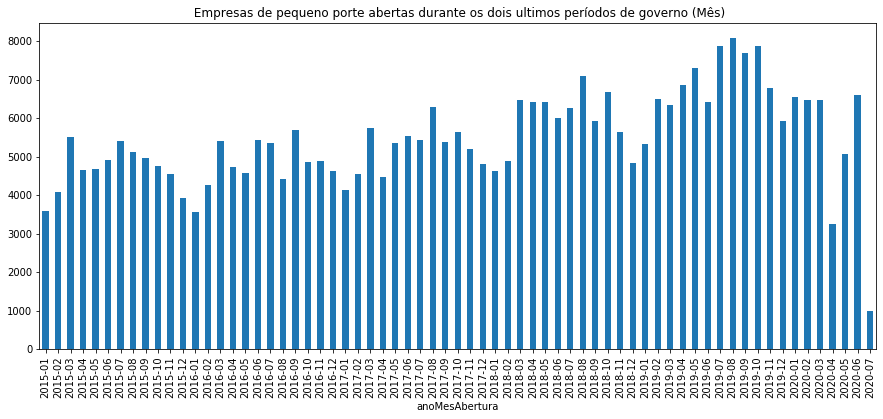

In [74]:
df_cnpj_full["anoMesAbertura"].groupby(df_cnpj_full["anoMesAbertura"]).agg('count').plot(kind="bar",
                                                                                         figsize = (15,6),
                                                                                         title = " Empresas de pequeno porte abertas durante os dois ultimos períodos de governo (Mês)")


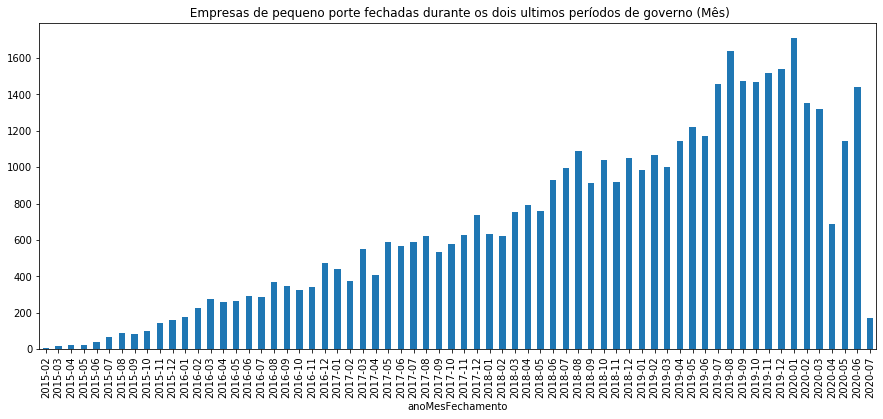

In [75]:
df_cnpj_fechada["anoMesFechamento"].groupby(df_cnpj_fechada["anoMesFechamento"]).agg('count').plot(kind="bar",
                                                                                         figsize = (15,6),
                                                                                         title = " Empresas de pequeno porte fechadas durante os dois ultimos períodos de governo (Mês)")

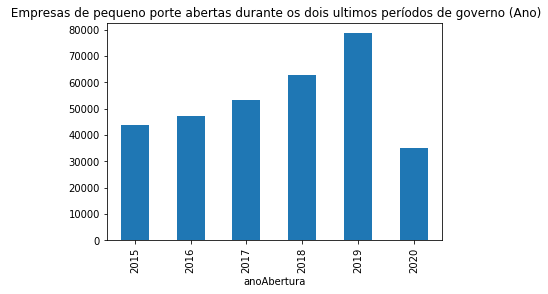

In [76]:
df_cnpj_full[df_cnpj_full["situacao_cadastral"] == '02']["anoAbertura"].groupby(df_cnpj_full["anoAbertura"]).agg('count').plot(kind="bar",
                                                                                   figsize = (6,4),
                                                                                   title = " Empresas de pequeno porte abertas durante os dois ultimos períodos de governo (Ano)")


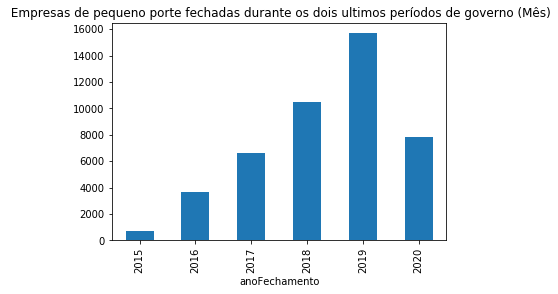

In [77]:
df_cnpj_fechada["anoFechamento"].groupby(df_cnpj_fechada["anoFechamento"]).agg('count').plot(kind="bar",
                                                                                         figsize = (6,4),
                                                                                         title = " Empresas de pequeno porte fechadas durante os dois ultimos períodos de governo (Mês)")

#### Empresas Abertas :
#### olhando o gráfico, é possível observar um ligeiro aumento na quantidade de empresas de pequeno porte que abriram com o passar dos anos. Já no primeiro ano de governo, comparando os anos de 2015 com 2019, o ano de 2019 desponta com a maior quantidade de empresas abertas, isso mesmo se for comparado com os demais anos presentes.
#### Empresas Fechadas :
#### Observando o gráfico geral, é possível ver um expressivo aumento de empresas fechadas com o passar dos anos, atingindo seu ápice em 2019.
#### Pesquisando foi possível encontrar que julho de 2019 alcançou o recorde de abertura de novos empreendimentos histórico : https://economia.uol.com.br/noticias/redacao/2019/10/04/numero-de-novas-empresas-bate-recorde-historico-em-julho-revela-serasa.htm  demonstrando comportamento que corrobora para o resultado do gráfico. 


## ----------------------------------------
## **Governadores e seus partidos**
## ----------------------------------------


In [78]:
## agrupando governadores por uf e contando
agrupando2014 = df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01") ][["NM_URNA_CANDIDATO","uf",'SG_PARTIDO']].groupby(["NM_URNA_CANDIDATO",'uf','SG_PARTIDO']).NM_URNA_CANDIDATO.agg('count')
agrupando2018 = df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2019-01-01")][["NM_URNA_CANDIDATO","uf",'SG_PARTIDO']].groupby(["NM_URNA_CANDIDATO",'uf','SG_PARTIDO']).NM_URNA_CANDIDATO.agg('count')
## transformando as chaves e quantidade em lista, para depois juntar em um dataset
dfgovernadoragrupado2014 = pd.DataFrame(agrupando2014.keys().to_list(),columns=['nome','uf','SG_PARTIDO'])
dfgovernadoragrupado2014['quantidade'] = agrupando2014.to_list()
dfgovernadoragrupado2018 = pd.DataFrame(agrupando2018.keys().to_list(),columns=['nome','uf','SG_PARTIDO'])
dfgovernadoragrupado2018['quantidade'] = agrupando2018.to_list()
## juntando com a população e criando métrica de empresas abertas/população da UF
governadorUfPopulacao2014 = dfgovernadoragrupado2014.merge(dfpopulacao.sort_values(by=['populacao'],ascending=False),left_on='uf', right_on='uf',how='left')
governadorUfPopulacao2014['aberto/populacao'] = governadorUfPopulacao2014['quantidade']/governadorUfPopulacao2014['populacao']
governadorUfPopulacao2018 = dfgovernadoragrupado2018.merge(dfpopulacao.sort_values(by=['populacao'],ascending=False),left_on='uf', right_on='uf',how='left')
governadorUfPopulacao2018['aberto/populacao'] = governadorUfPopulacao2018['quantidade']/governadorUfPopulacao2018['populacao']


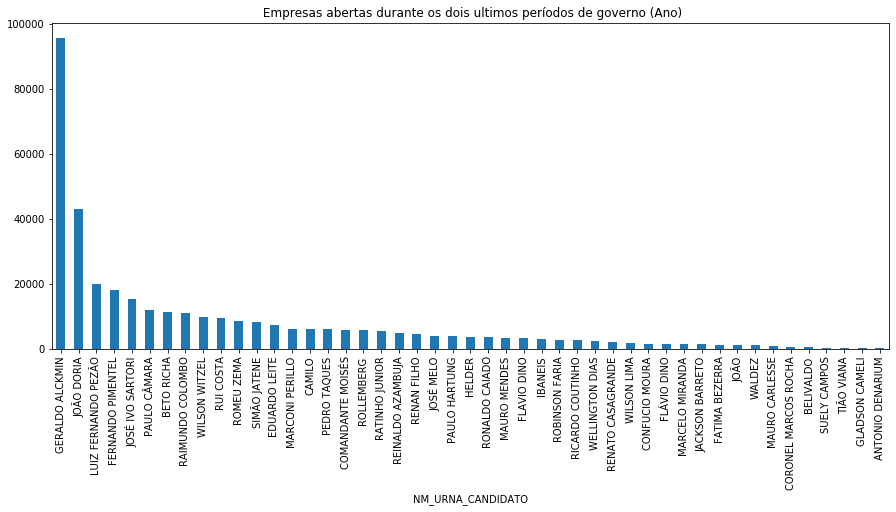

In [79]:
##governadores
df_cnpj_full["NM_URNA_CANDIDATO"].groupby(df_cnpj_full["NM_URNA_CANDIDATO"]).agg('count').nlargest(100).plot(kind="bar",
                                                                                    figsize = (15,6),
                                                                                    title = " Empresas abertas durante os dois ultimos períodos de governo (Ano)")

#### Em números absolutos, os governadores de onde mais abriram empresas são os das UF com maior quantidade de população. Para uma melhor visualização, será feito uma separação do ano da posse, pois só existem dados até julho de 2020, e seus respectivos números levando em conta a métrica de empresas abertas/população.

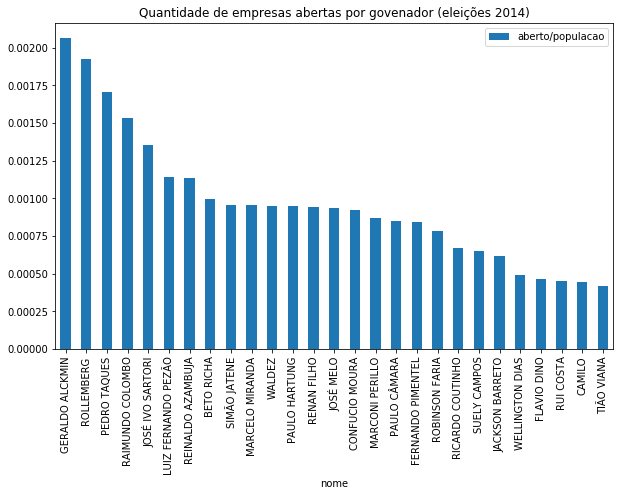

In [80]:
##governadores
governadorUfPopulacao2014.sort_values(by=['aberto/populacao'],ascending=False).plot(x='nome',y='aberto/populacao',kind="bar",figsize = (10,6),title = "Quantidade de empresas abertas por govenador (eleições 2014)")

#### Após aplicação da métrica, é possível observar que a diferença entre os governadores que era bem grande, diminuiu. Geraldo Alckmin ainda é o primeiro colocado na lista, mas seguindo ele aparece Rollemberg (DF) e Pedro Taques (MT), demonstrando que embora a população do estado desses governadores correspondam a cerca de 1,4% (20º ranking de população) e 1,7% (17º ranking de população) respectivamente, proporcionalmente no período de seu governo abriram mais empresas que a maioria dos outros governadores.
#### Fernando Pimental (MG) e Luiz Fernando Pezão (RJ) que gorvernaram respectivamente a 2º e 3º UF mais populosas, aparecem mais atrás nas lista, com Fernando figurando na 18º posição e Pezão em 6º.
#### é importante avaliar as estratégias utilizadas principalmente por Rollembrg e Pedro Taques, que embora fossem governadores de regiões menos populosas, alcançaram uma ótima posição no ranking de abertura e empresas. 
#### *Em 2017 Rollemberg facilitou o registro e licenciamento de empresas, permitindo que a abertura de negócios ocorra em até minutos.
#### *Com Pedro Taques foi implementado a Lei Geral da Micro e Pequena Empresa, tirando essas empresas da informalidade, e fornecendo menor quantidade de impostos para os empresários.

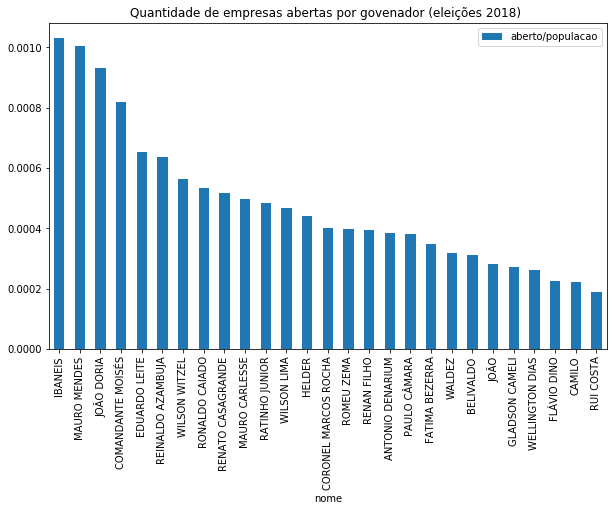

In [81]:
##governadores
governadorUfPopulacao2018.sort_values(by=['aberto/populacao'],ascending=False).plot(x='nome',y='aberto/populacao',kind="bar",figsize = (10,6),title = "Quantidade de empresas abertas por govenador (eleições 2018) ")

#### Visualizando o gráfico em sua versão pós eleição de 2018, algumas alterações aparecem. O governador de SP, João Doria, aparece na 3º posição, fazendo SP perder o posto da primeira colocação. Agora Ibaneis (DF) lidera entre os governadores das UF que proporcionalmente mais abiram empresas, seguido por Mauro Mendes (MT). Essa troca de posição demonstra que DF e MT continuam bem, ganhando 1 posição cada.
#### Reinaldo Azambuja (MS) que foi reeleito também subiu uma posição, passando Witzel (RJ), demonstrando que após a eleição de 2018, RJ não manteu sua quantidade de empresas abertas.
#### O Acre que se encontrava na última posição com Tião Costa após a eleição de 2014, depois da última eleição subiu 4 posições com Gladson Cameli no poder, já a Bahia que estava na terceira pior colocação, com Rui Costa, foi para a ultima posição após sua reeleição.

#### *Gladison Cameli simplificou o processo de abertura de empresas no dia 16/03/2020

In [82]:
## população
# dfpopulacao.sort_values(by=['populacao'],ascending=False).plot(kind="bar",
#                  x="uf",
#                  figsize = (20,8),
#                  title = " População por UF")
# plt.ticklabel_format(style='plain', axis='y')


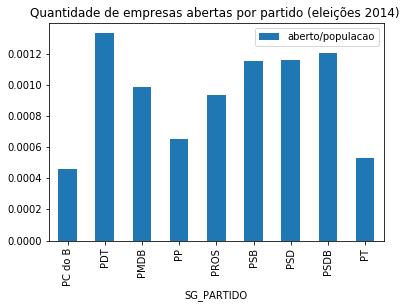

In [83]:
## partidos
governadorUfPopulacao2014[['SG_PARTIDO','aberto/populacao']].groupby(["SG_PARTIDO"]).agg('mean').plot(kind='bar', title='Quantidade de empresas abertas por partido (eleições 2014) ')

#### durante o governo dos eleitos nas eleições de 2014, PT e PC do B foram os partidos que tiveram proporcionalmente menos empresas abertas. o PC do B com 1 governador (MA) e o PT com 5 (AC,CE,BA,MG,PI), de todos esses estados, apenas MG e AC não se encontra no nordeste, demonstrando uma preferência do público nordestino por partidos voltados mais a esquerda.
#### já na outra ponta se destacam o PDT e o PSB. O PDT com 2 governadores (AP,MG) e o PSDB com 5 (GO,MS,PA,PR,SP).

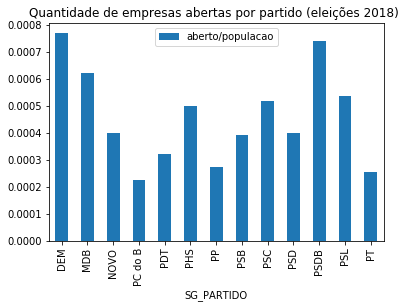

In [84]:
## partidos
governadorUfPopulacao2018[['SG_PARTIDO','aberto/populacao']].groupby(["SG_PARTIDO"]).agg('mean').plot(kind='bar',title = 'Quantidade de empresas abertas por partido (eleições 2018) ')

#### Já após as eleições de 2018, os dois partidos que mais se destacam são o DEM e o PSDB. o DEM com 2 governadores (GO,MT), e o PSDB com 3 (MS,RS,SP). O PSDB por sua vez com uma quantidade inferior de governadores, comparado a eleição anterior.
#### Na parte de baixo do gráfico, assim como em 2014, PT e PC do B continuam como os piores partidos, seguidos logo de perto pelo PP. Dessa vez todos os os governadores do PT e PC do B são da região nordeste.
#### Após observar os dois gráficos é possível observar que a região nordeste é a que possui mais dificuldade em abrir novas empresas, proporcionalmente falando, isso demonstra que os governadores dessa região, tendem a investir mais em outras áreas, o que acaba por não atrair muitas empresas de pequeno porte.

## --------------------------
## Tipos de Empresas
## --------------------------


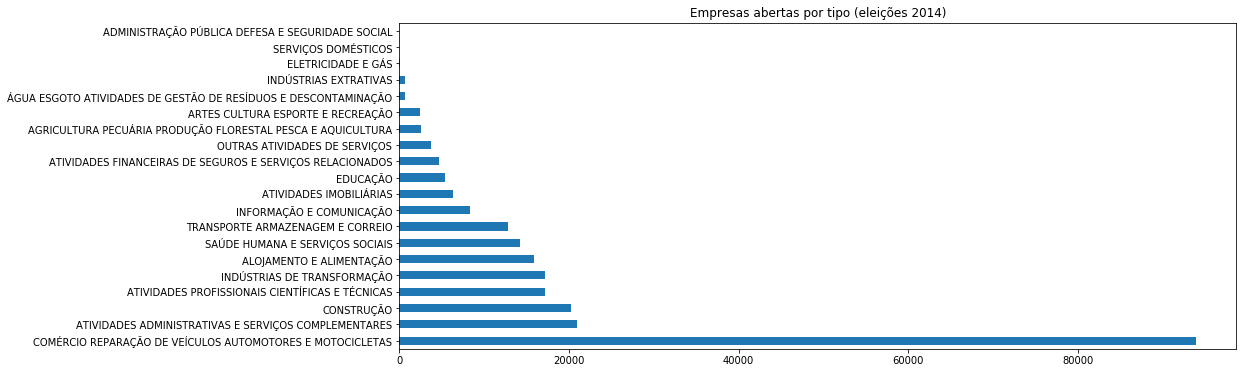

In [85]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01") ].nm_secao.value_counts().plot(kind='barh'
                                                                                                                                                            ,figsize = (15,6),
                                                                                                                                                            title='Empresas abertas por tipo (eleições 2014)')

#### Durante o período dos governantes eleitos em 2014, o tipo de empresas que mais abriram foram :
#### * Comércio reparação de veículos automotores e motocicletas.
#### * Atividades administrativas e serviços complementares.
#### * Construção.
#### * Atividades profissionais científicas e técnicas.
#### * Indústrias de transformação.

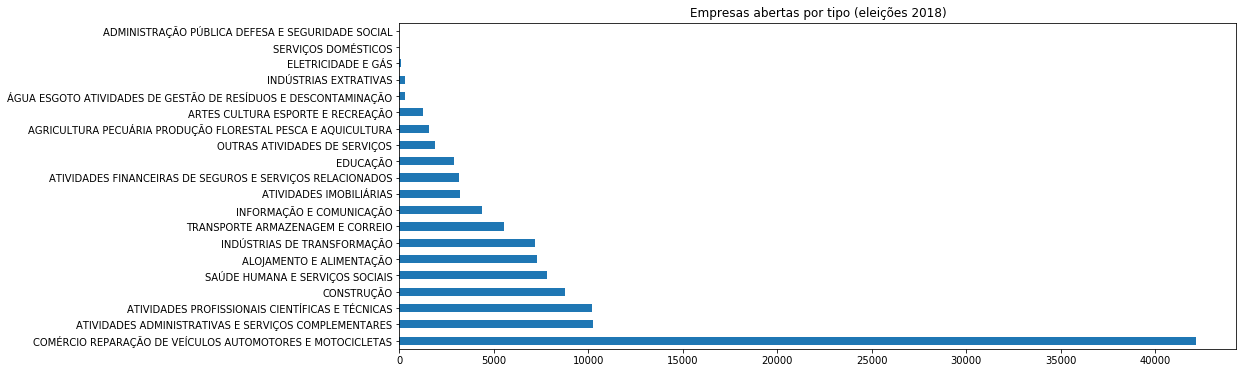

In [86]:
df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2019-01-01")].nm_secao.value_counts().plot(kind='barh',figsize = (15,6),title='Empresas abertas por tipo (eleições 2018)')

#### Durante o período dos governantes eleitos em 2018, o tipo de empresas que mais abriram foram :
#### * Comércio reparação de veículos automotores e motocicletas.
#### * Atividades administrativas e serviços complementares.
#### * Atividades profissionais científicas e técnicas.
#### * Construção.
#### * Saúde humana e serviços sociais.

## Comparando os períodos.
#### * Entre 2019-2020, Atividades profissionais científicas e técnicas e Saúde humana e serviços sociais subiram posições no gráfico. Esse resultado pode ser consequência da pandêmia que tomou conta do país em março de 2020, exigindo mais da área científica e da saúde.
#### * Já Comércio reparação de veículos automotores e motocicletas lidera com grande diferença nos dois períodos.

## --------------------------------------------------------------------------------------------------------------------
## **Análise dos tipos de empresas, levando em consideração os governadores que mais se destacaram** 
## --------------------------------------------------------------------------------------------------------------------


### Janeiro 2015 - Dezembro 2018

In [87]:
## função para mostrar o tipo de empresa que mais abriu e fechou
def tipoAbriuFechou(governador):    
    fig, ax = plt.subplots(nrows=2, figsize=(10,10))

    df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01")
               & (df_cnpj_full['NM_URNA_CANDIDATO'] == governador)  ].nm_secao.value_counts().nlargest(5).sort_values().plot(kind='barh',

                                                                                                        title=f'Governo {governador.title() } \n( 5 tipos de empresas menos abertas)',
                                                                                                        ax=ax[0])
    df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2015-01-01") & (df_cnpj_full['data_inicio_atividade'] < "2019-1-01")
               & (df_cnpj_full['NM_URNA_CANDIDATO'] == governador)  ].nm_secao.value_counts().nsmallest(5).sort_values().plot(kind='barh',

                                                                                                        title=f'Governo {governador.title() } \n( 5 tipos de empresas menos abertas)',
                                                                                                        ax=ax[1])


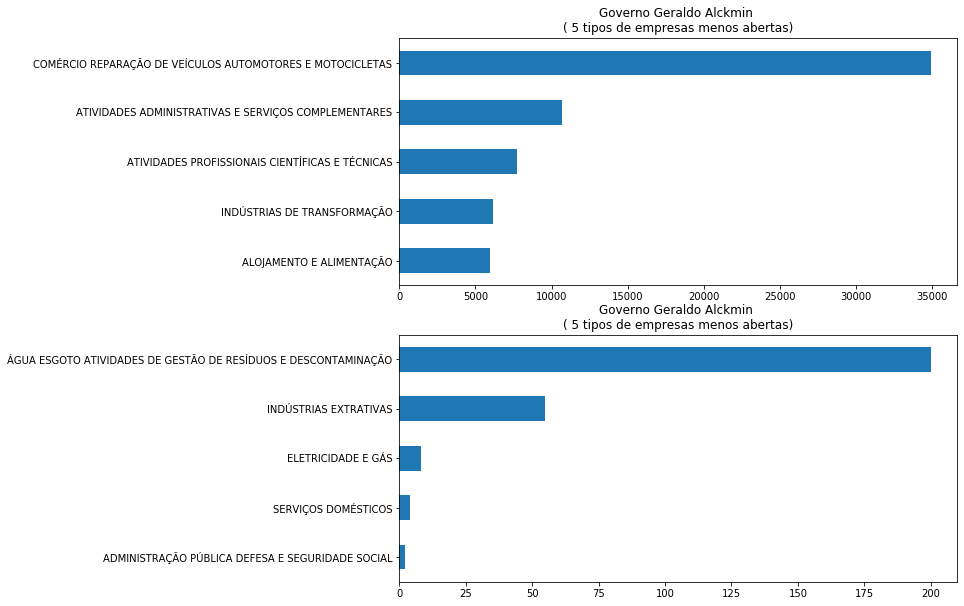

In [88]:
## empresas que mais abiram e fecharam durante o governo Geraldo Alckmin
tipoAbriuFechou('GERALDO ALCKMIN')

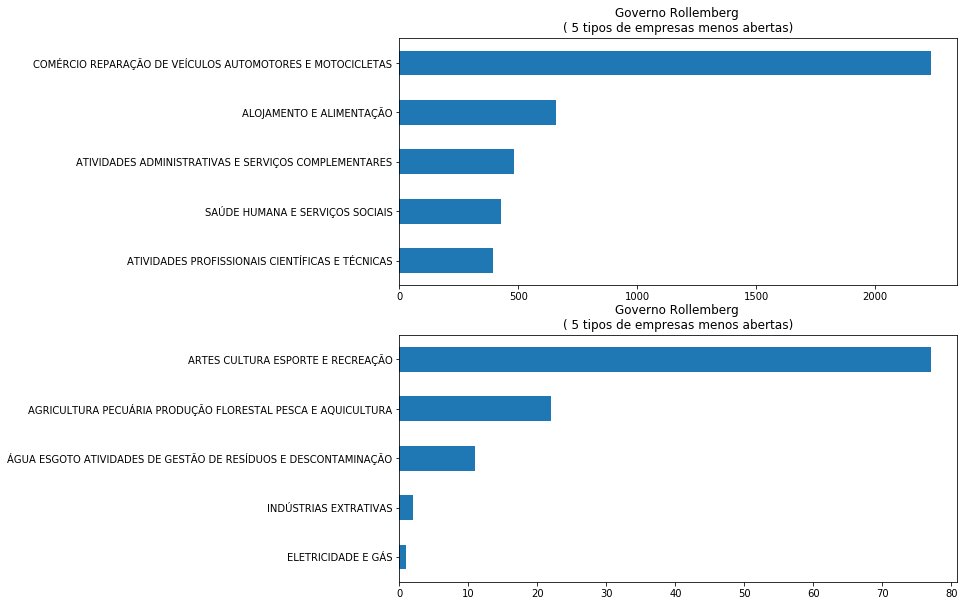

In [89]:
## empresas que mais abiram e fecharam durante o governo Rollemberg
tipoAbriuFechou('ROLLEMBERG')

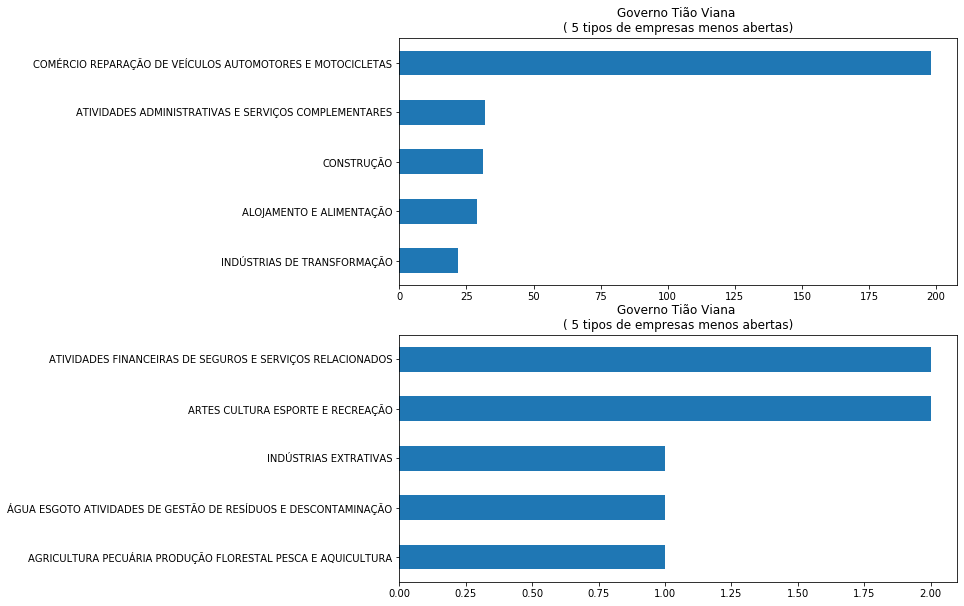

In [90]:
## empresas que mais abiram e fecharam durante o governo Tião Viana
tipoAbriuFechou('TIÃO VIANA')

#### * Entre os governadores com melhores resultados a maior diferença entre os 5 tipos que mais abrem está no tipo saúde humana e serviço sociais que aparece na 4º posição do governo rollemberg e não aparece no top 5 do governo Geraldo Alckmin, e industrias de transformação que figura entre o top 5 de Geraldo Alckmin. Agora olhando o Governador que menos abriu empresas (Tião Viana), na terceira posição aparece empresas do setor de construção, o que não aparece entre as mais abertas dos outros 2 governadores, demonstrando maiores oportunidades para esse tipo de empresa no Acre.

#### Na parte de baixo da tabela, administração pública defesa e seguridade social chama atenção, sendo o tipo que menos abriu durante o governo Alckmin e não chegando nem a aparecer durante os outros governadores, demonstrando ser um tipo de empresa que raramente é aberta.

### Janeiro 2019 - julho 2020

In [91]:
## função alterando período
def tipoAbriuFechou2018(governador):    
    fig, ax = plt.subplots(nrows=2, figsize=(10,10))
    df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2019-01-01") & (df_cnpj_full['NM_URNA_CANDIDATO'] == governador)  ].nm_secao.value_counts().nlargest(5).sort_values().plot(kind='barh',
                                                                                                        title=f'Governo {governador.title() } \n( 5 tipos de empresas menos abertas)',
                                                                                                        ax=ax[0])
    df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2019-01-01") & (df_cnpj_full['NM_URNA_CANDIDATO'] == governador)  ].nm_secao.value_counts().nsmallest(5).sort_values().plot(kind='barh',
                                                                                                        title=f'Governo {governador.title() } \n( 5 tipos de empresas menos abertas)',
                                                                                                        ax=ax[1])

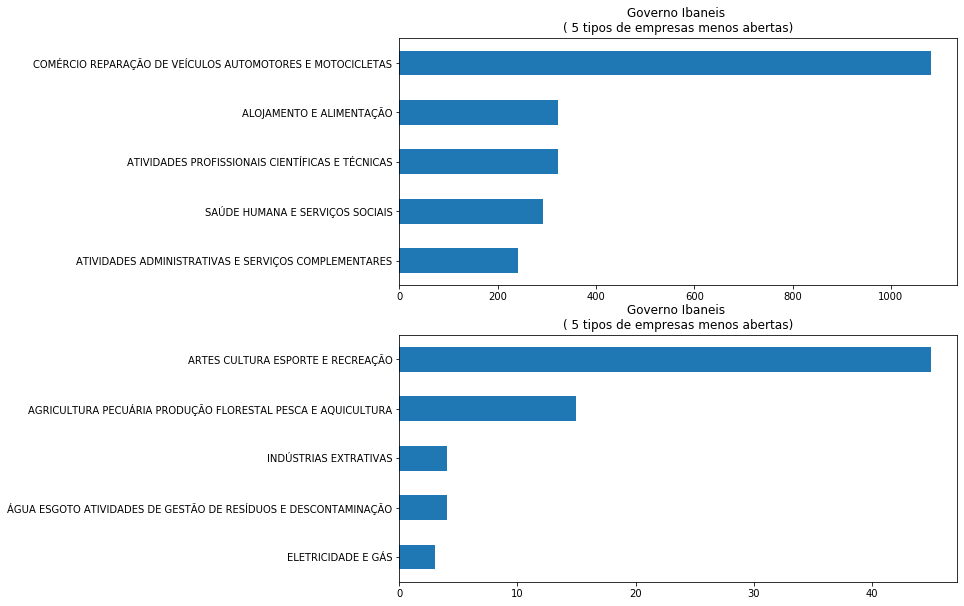

In [92]:
tipoAbriuFechou2018('IBANEIS')

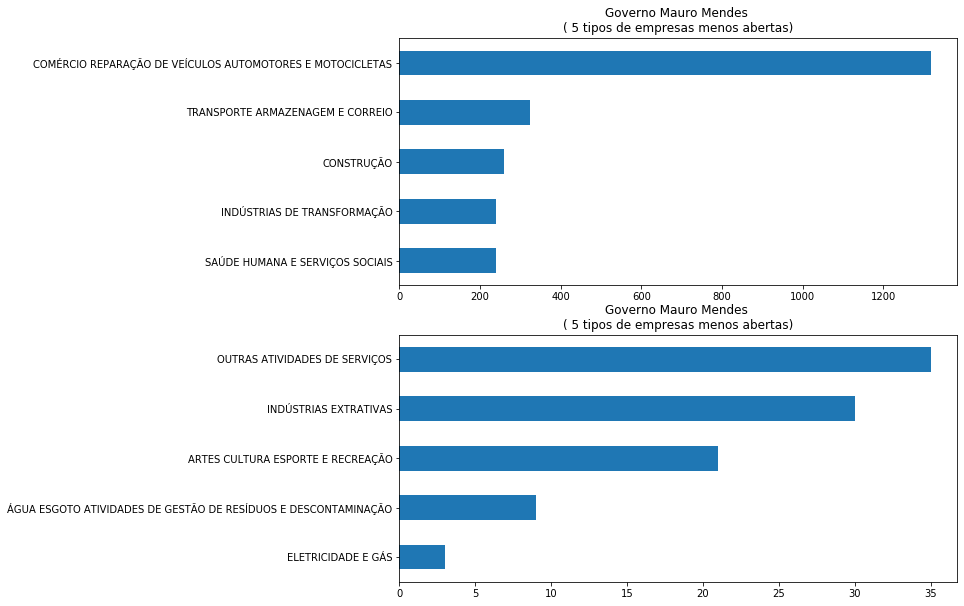

In [93]:
tipoAbriuFechou2018('MAURO MENDES')

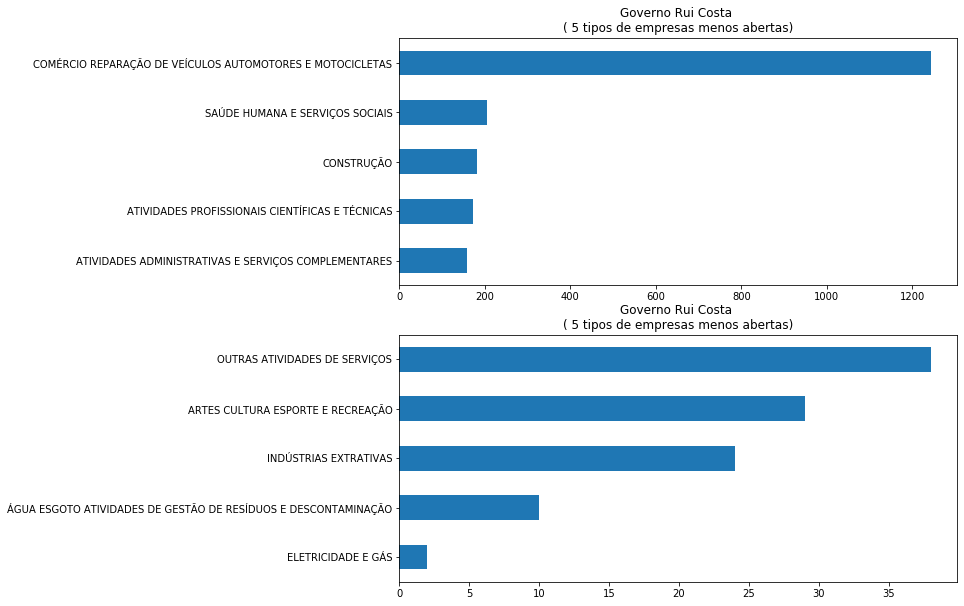

In [94]:
tipoAbriuFechou2018('RUI COSTA')

#### * Comparando o governo Ibaneis com o anterior, as empresas que mais abriram permanecem as mesmas, ocorrendo somente algumas trocas de posição.
#### * Observando o governo Mauro Mendes, transporte armazenagem e correio chama atenção, não aparecendo entre as mais abertas de nenhum dos governadores que foram selecionados para serem observados, demonstrando que Mato Grosso é uma boa área para de abrir empresas desse setor. A confirmação da empresa Rumo sobre a expanção em Mato Grosso da ferrovia que compõe a Malha Norte é um indício do forte investimento nessa área.
#### * O governo Rui Costa, que foi o que menos abriu empresas, foi onde saúde humana e serviços sociais apareceu na posição mais alta dentre os governadores observados, demostrando uma grande preocupação com essa área na Bahia.

## --------------------------------------------------------------------------------------------------------------------
## **Um olhar mais atento ao período do COVID-19 e as empresas afetadas** 
## --------------------------------------------------------------------------------------------------------------------

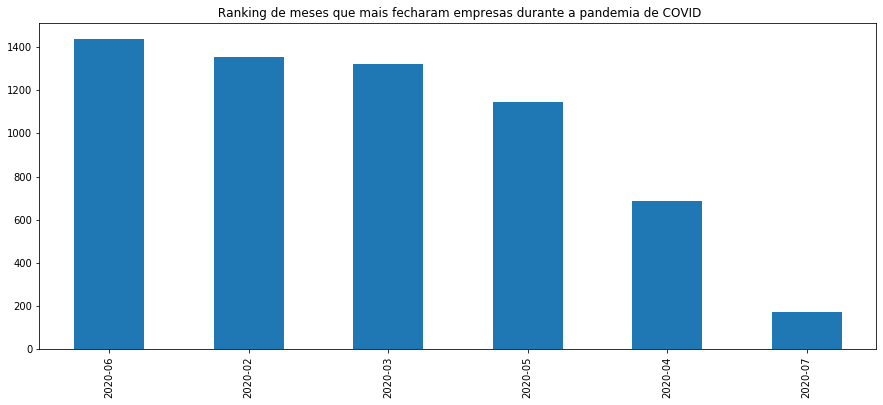

In [95]:
## utilizando dia do primeiro caso confirmado
df_cnpj_fechada['anoMesFechamento'][df_cnpj_fechada['anoMesFechamento'] >= '2020-02'].value_counts().plot(kind="bar",
                                                                                         figsize = (15,6),
                                                                                         title = " Ranking de meses que mais fecharam empresas durante a pandemia de COVID")

#### Durante a pandemia os mêses que mais fecharam empresas foram junho, fevereiro e março. Julho obteve apenas uma pequena quantidade pois não foi utilizado seus dados em totalidade.

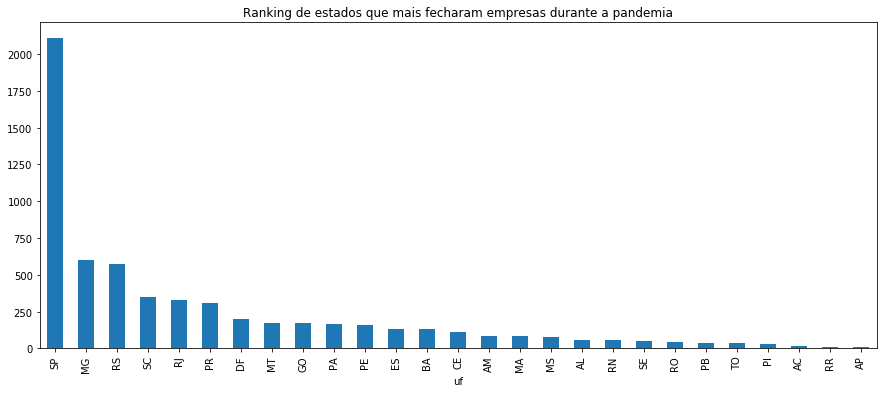

In [99]:

df_cnpj_fechada['anoMesFechamento'][df_cnpj_fechada['anoMesFechamento'] >= '2020-02'].groupby(df_cnpj_full["uf"]).agg('count').nlargest(100).plot(kind="bar",
                                                                                    figsize = (15,6),
                                                                                    title = "Ranking de estados que mais fecharam empresas durante a pandemia")

#### entre os estados que mais fecharam empresas no período, em primeiro lugar aparece o já esperado são paulo. Chama atenção Santa Catarina aparecendo na 4º posição, dado que populacionalmente se encontra na 10º posição. Isso demonstra inaptidão nas tomadas de decição durante o período pandêmico. Outra UF que também chama atenção foi o DF, que aparece em 7º, mas em quantidade populacional se encontra em 20º lugar, isso pode ser devido a ser um dos primeiros governadores que optou pelo fechamento de diversos estabelecimentos não essenciais, afetando diversas empresas. Já Amapá, Roraima e Acre, fecharam bem poucas empresas, demonstrando que o COVID não afetou tanto as empresas ali existentes.

## Empresas que abriram e também fecharam durante a pandemia.

In [97]:
## Empresas que abriram durante a pandemia, e fecharam 
agrupandoCovid = df_cnpj_full[(df_cnpj_full['data_inicio_atividade'] >= "2020-02-26")][df_cnpj_full['situacao_cadastral']=='08'][["NM_URNA_CANDIDATO","uf",'SG_PARTIDO']].groupby(["NM_URNA_CANDIDATO",'uf','SG_PARTIDO']).NM_URNA_CANDIDATO.agg('count')
dfagrupandoCovid = pd.DataFrame(agrupandoCovid.keys().to_list(),columns=['nome','uf','SG_PARTIDO'])
dfagrupandoCovid['quantidade'] = agrupandoCovid.to_list()
governadorUfPopulacaoCovid = dfagrupandoCovid.merge(dfpopulacao.sort_values(by=['populacao'],ascending=False),left_on='uf', right_on='uf',how='left')
governadorUfPopulacaoCovid['aberto/populacao'] = governadorUfPopulacaoCovid['quantidade']/governadorUfPopulacaoCovid['populacao']

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


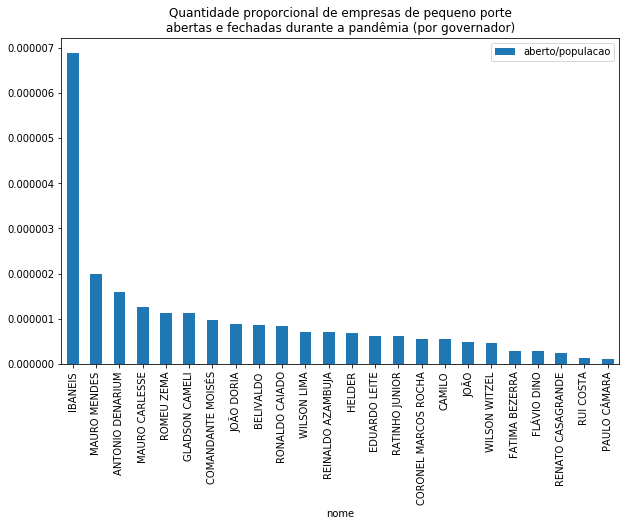

In [98]:
governadorUfPopulacaoCovid.sort_values(by=['aberto/populacao'],ascending=False).plot(x='nome',y='aberto/populacao',kind="bar",figsize = (10,6),title = "Quantidade proporcional de empresas de pequeno porte\n abertas e fechadas durante a pandêmia (por governador) ")

#### Proporcionalmente Ibaneis foi mais empresas que abriram durante o período e também fecharam, a criação de novas empresas para atuar especificamente no combate ao Covid, pode ser a resposta para essa grande diferença, visto que o DF é o estado com a menor taxa de morte do Brasil : https://www.agenciabrasilia.df.gov.br/2020/05/26/df-tem-a-menor-taxa-de-letalidade-por-covid-19-do-pais/ . Demonstrando boas tomadas de deciões e um Sistema Público de Saúde mais preparado que as demais UF. Já Pernambuco de Paulo Câmara, foi onde menos aconteceu de empresas abrirem e fecharem durante esse período, no gráfico por estado é possível ver que que Pernambuco aparece entre os 6 que menos fecharam empresas, o que corrobora a um resultado proporcional baixo.

# -----------------------
# Conclusão
# -----------------------

## Após toda a análise dos dados, foi possível observar as diferenças entre estados, governantes e partidos durante os 2 últimos governos e no período do pandemia, no que diz respeito a empresas de pequeno porte.
## Para uma melhor comparação, algumas métricas foram criadas ao longo do trabalho, pois não iria ser fácil comparar mega estados como SP com outros como RR que possui uma população cerva de 75x menor. Outras técnicas adotadas foram a comparação por período, pois também não era possível comparar todo o governo, já que ainda não chegamos na metade do governo que começou em janeiro de 2019. Mesmo assim foi possível levantar coisas como tipo de empresas mais abertas por partidos, períodos que abriram e fecharam mais e empresas que abriram durante a pandemia, mas não conseguiram se manter.
## Outro fator que foi importante de se observar durante o trabalho foram as diferenças principalmente de tipos de empresas que abriram dependendo da UF e governo, demonstrando as diferentes escolhas de áreas de foco e necessidades dos diferentes estados, partidos e governadores.
